Dataset Link : https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction/data

About Dataset

INTRODUCTION

The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

Research Questions

The aim of our study is to answer the below research questions:
a) Does price vary with Airlines?
b) How is the price affected when tickets are bought in just 1 or 2 days before departure?
c) Does ticket price change based on the departure time and arrival time?
d) How the price changes with change in Source and Destination?
e) How does the ticket price vary between Economy and Business class?

DATA COLLECTION AND METHODOLOGY

Octoparse scraping tool was used to extract data from the website. Data was collected in two parts: one for economy class tickets and another for business class tickets. A total of 300261 distinct flight booking options was extracted from the site. Data was collected for 50 days, from February 11th to March 31st, 2022.
Data source was secondary data and was collected from Ease my trip website.

DATASET

Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset.

FEATURES

The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

In [1]:
! pip install pandas
! pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\fd01127\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\fd01127\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# Importing the required library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Reading the dataset
pd.read_csv("Clean_Dataset.csv")

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


- We will drop "Unnamed: 0" feature in data cleaning step.

In [4]:
# Storing dataset into data variable
data = pd.read_csv("Clean_Dataset.csv")

In [5]:
# Checking the shape of the data.
data.shape

(300153, 12)

In [6]:
# Making copy of data
df = data.copy()

In [7]:
# df = df.sample(n=4000, random_state=42)

In [8]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [9]:
# Displaying a sample of the data.
df.sample(5)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
100277,100277,AirAsia,I5-972,Bangalore,Evening,two_or_more,Late_Night,Mumbai,Economy,10.00,36,5299
146433,146433,Indigo,6E-563,Kolkata,Morning,one,Afternoon,Hyderabad,Economy,5.08,36,4148
11343,11343,Air_India,AI-839,Delhi,Night,one,Afternoon,Bangalore,Economy,16.92,9,9840
259377,259377,Air_India,AI-610,Bangalore,Evening,one,Morning,Chennai,Business,15.75,13,43865
199859,199859,Vistara,UK-838,Chennai,Night,one,Night,Kolkata,Economy,25.67,22,5937


#### STEP 1 - Data Cleaning

In [10]:
# Checking dataset information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [11]:
# Dropping the features that are not required.
df.drop(columns="Unnamed: 0",inplace=True)

In [12]:
# Data after droping irrelavent feature
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [13]:
# Checking the missing values.
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

##### No Missing Values

In [14]:
# Checking if there are duplicate values in the data.
df.duplicated().sum()

0

- Their are no duplicate values in the dataset.

#### Univariate Analysis

#### Price feature

In [15]:
df['price'].describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

- Minimum price value for ticket is 1105 whereas maximum price is 123071.

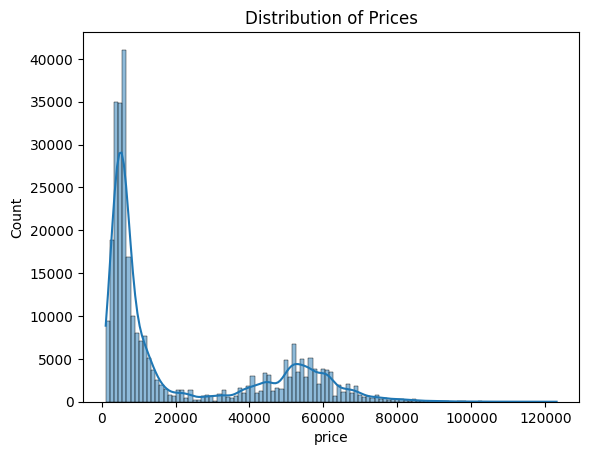

In [16]:
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Prices')
plt.show()

- Most of the price of the flight lies in the range of 1,000 to 20,000.
- Their are some flight which have price greater in the range of 40000 to 80000.

In [17]:
df['price'].skew()

1.0613772532064343

- The price feature is positive skewness.

#### Airline feature

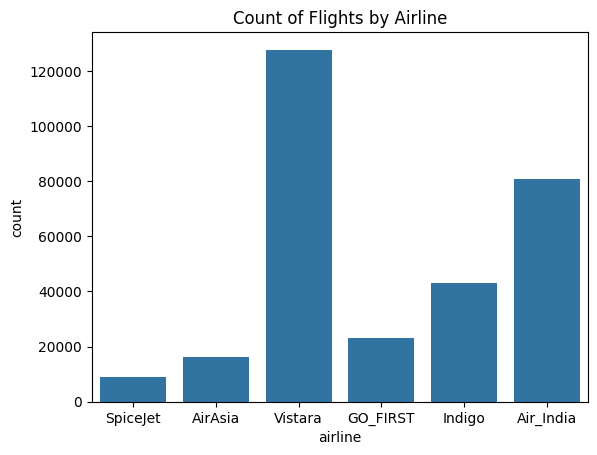

In [18]:
sns.countplot(x='airline', data=df)
plt.title('Count of Flights by Airline')
plt.show()

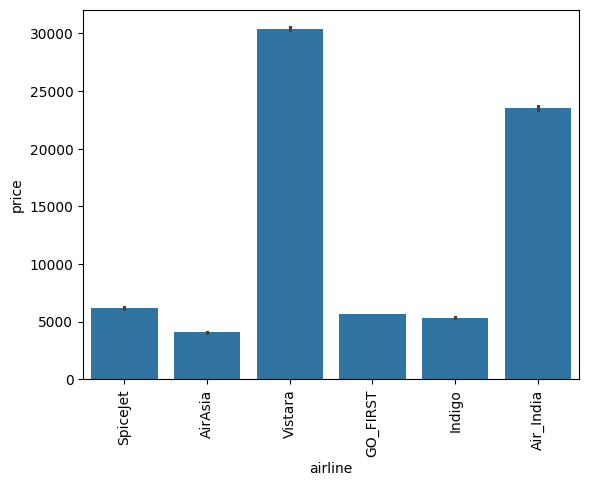

In [19]:
sns.barplot(x=df['airline'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='airline', ylabel='price'>

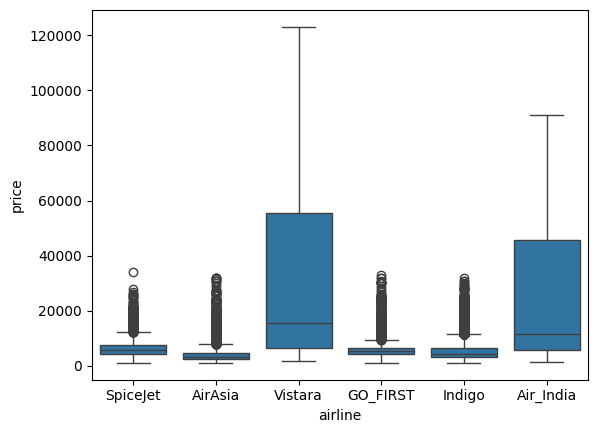

In [20]:
sns.boxplot(x = 'airline', y = 'price', data = df)

- Most used airline is Vistara then comes Air India

In [21]:
len(df['flight'].unique())

1561

#### source_city

In [22]:
df["source_city"].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

<Axes: xlabel='source_city'>

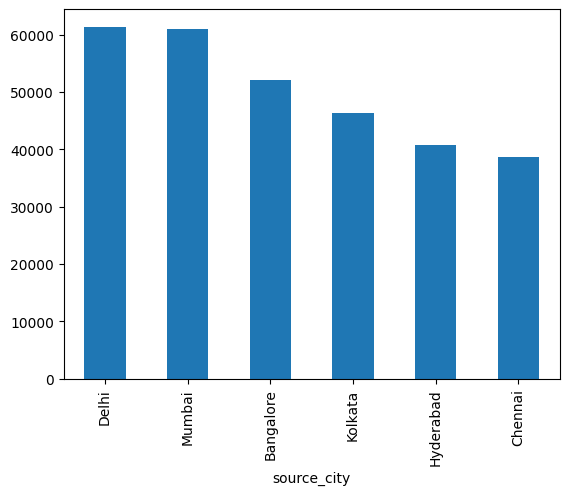

In [23]:
df['source_city'].value_counts().plot(kind='bar')

- Top source city are Delhi and Mumbai.

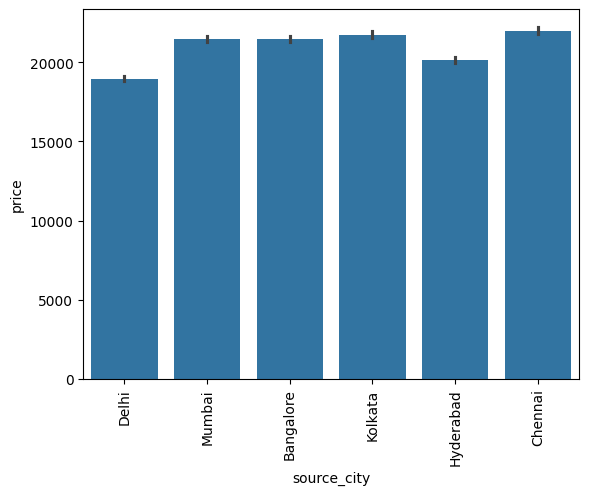

In [24]:
sns.barplot(x=df['source_city'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='source_city', ylabel='price'>

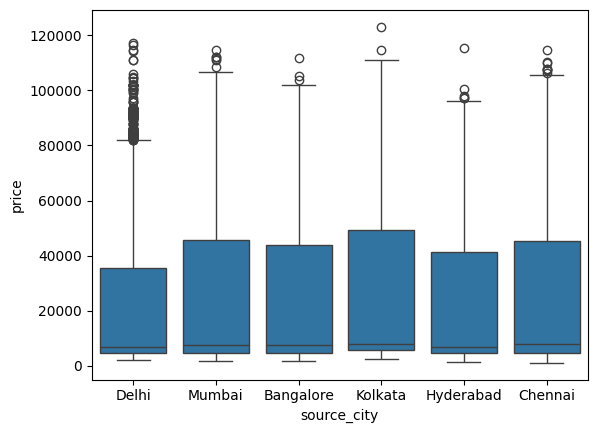

In [25]:
sns.boxplot(x = 'source_city', y = 'price', data = df)

<Axes: xlabel='departure_time'>

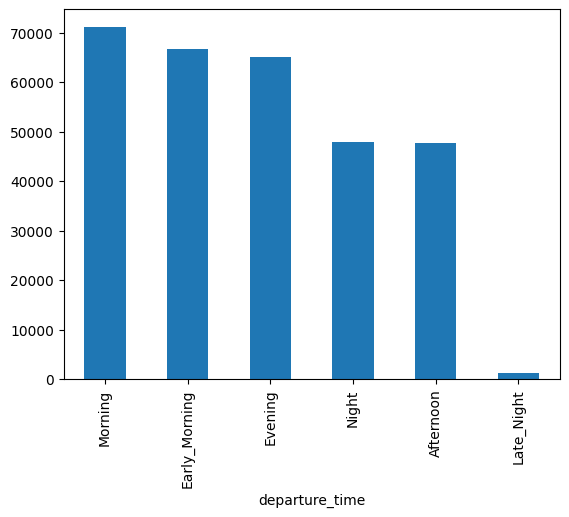

In [26]:
df['departure_time'].value_counts().plot(kind='bar')

- Morning flight are more as compared to other departure time.

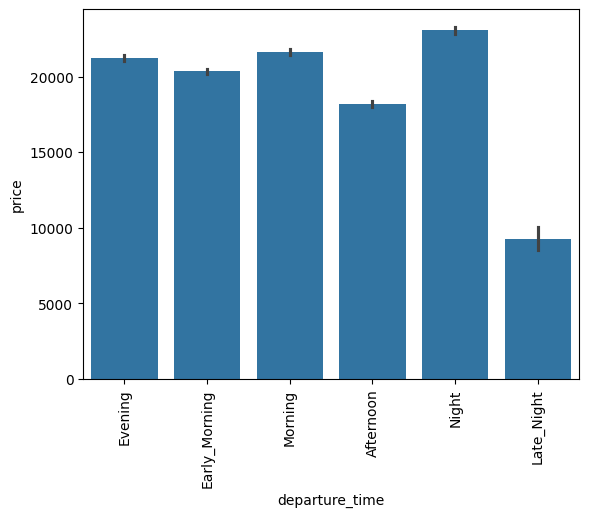

In [27]:
sns.barplot(x=df['departure_time'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

- Overall the price is more for Night Flight.
- Late night departure time flight fare is less as compare to others.

<Axes: xlabel='departure_time', ylabel='price'>

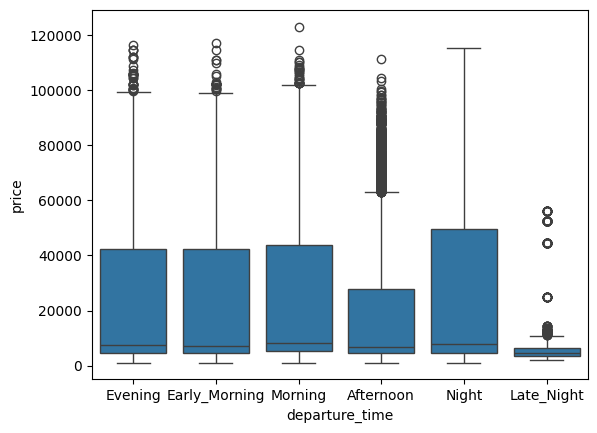

In [28]:
sns.boxplot(x = 'departure_time', y = 'price', data = df)

In [29]:
df["stops"].value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

<Axes: xlabel='stops'>

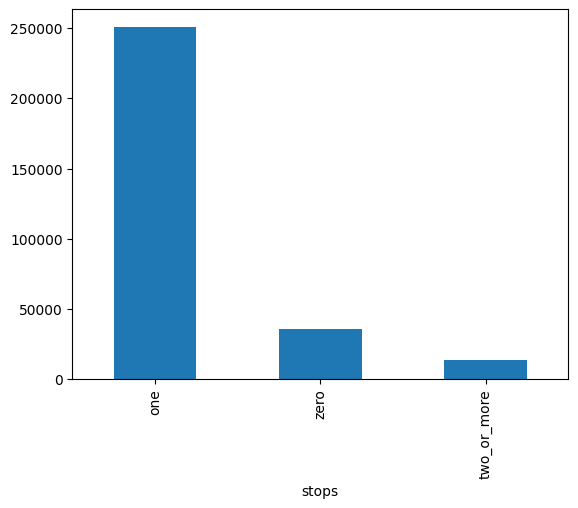

In [30]:
df['stops'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

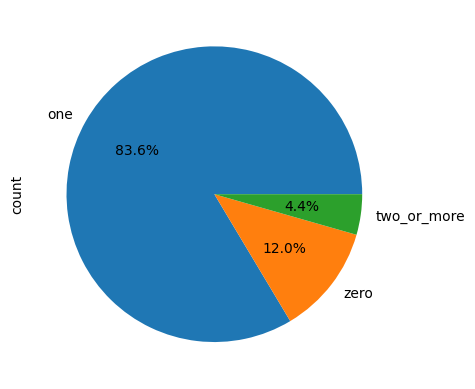

In [31]:
df['stops'].value_counts().plot(kind='pie',autopct='%0.1f%%')

- Most of the flights have 1 stop about 83%.

- Just 4% of flights have 2 or more than 2 stops.

- About 12% of flights have not any stop.

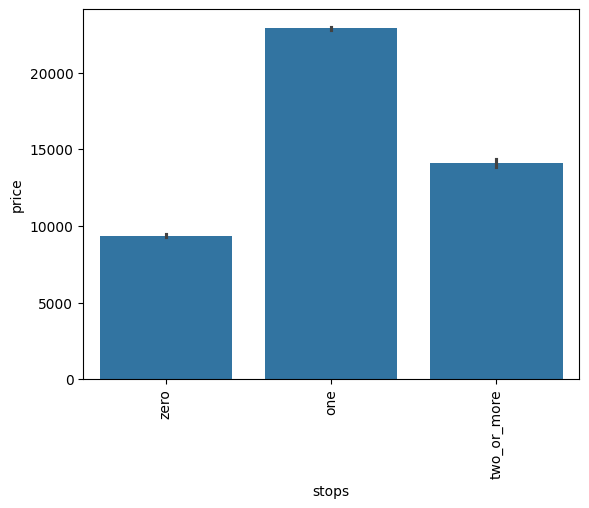

In [32]:
sns.barplot(x=df['stops'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='stops', ylabel='price'>

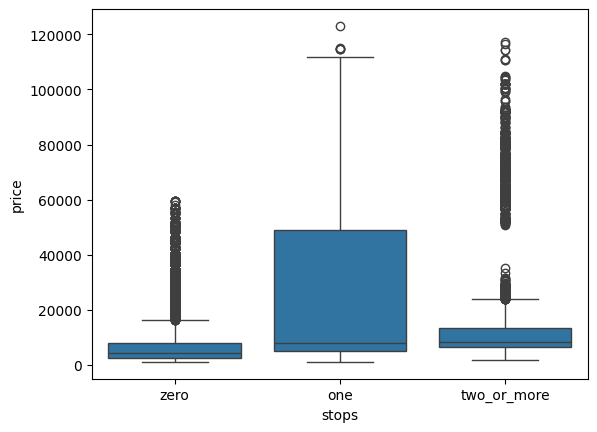

In [33]:
sns.boxplot(x = 'stops', y = 'price', data = df)

- One Stop flights are more costly than as compare to zero stop and two or more stops

In [34]:
df["arrival_time"].value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

<Axes: xlabel='arrival_time'>

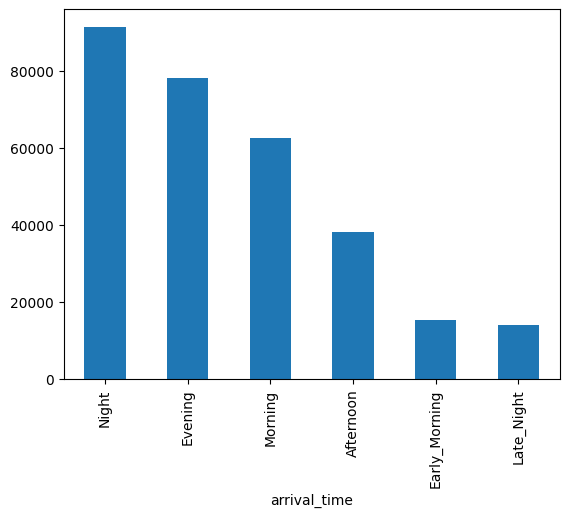

In [35]:
df['arrival_time'].value_counts().plot(kind='bar')

- Most flight has arrival time is Night.

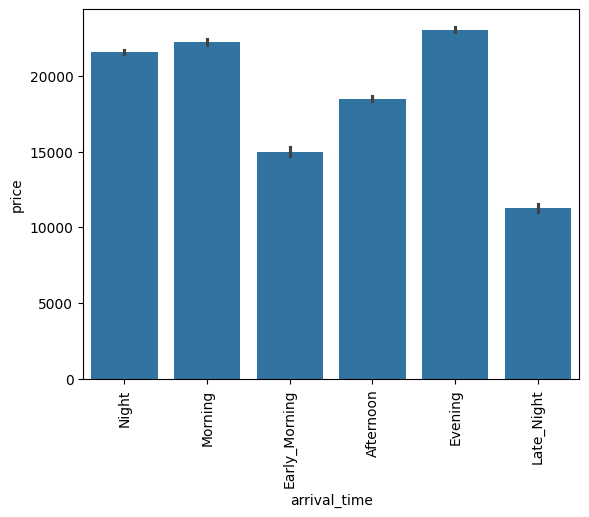

In [36]:
sns.barplot(x=df['arrival_time'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='arrival_time', ylabel='price'>

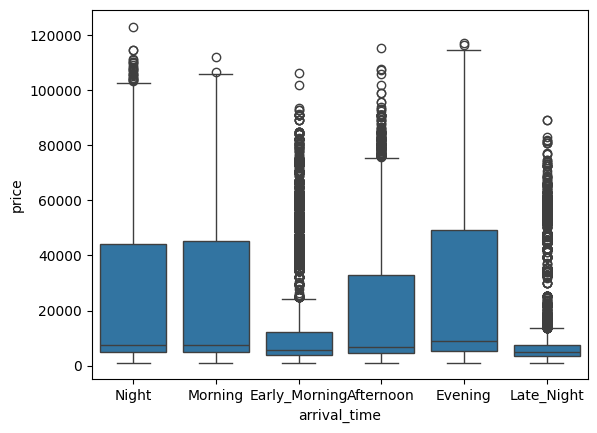

In [37]:
sns.boxplot(x = 'arrival_time', y = 'price', data = df)

- Price is more for Evening Fight.
- Late Night flight arrival has less fare amount.

In [38]:
df["destination_city"].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

<Axes: xlabel='destination_city'>

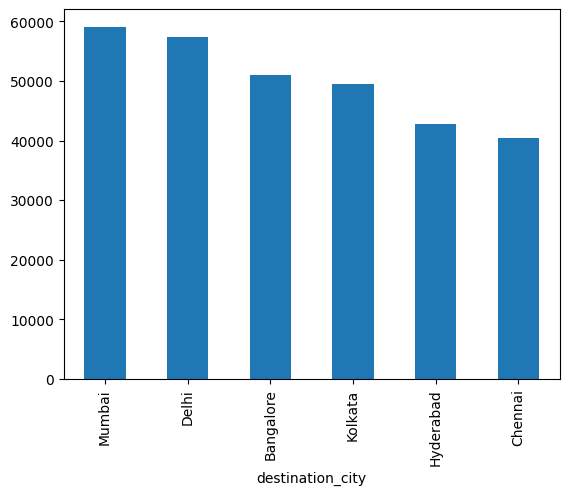

In [39]:
df['destination_city'].value_counts().plot(kind='bar')

- Mumbai and Delhi are the most destination city.

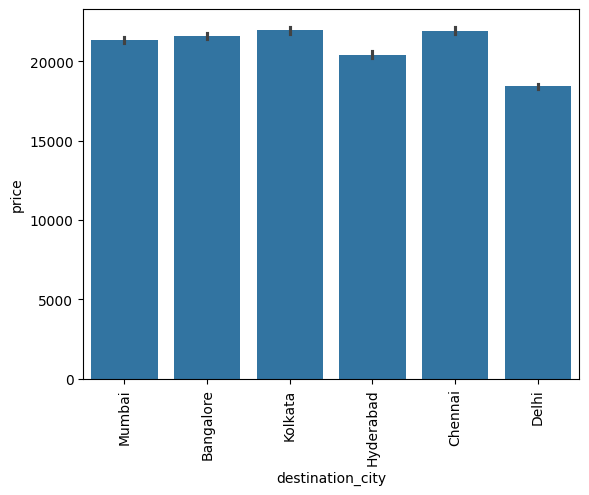

In [40]:
sns.barplot(x=df['destination_city'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='destination_city', ylabel='price'>

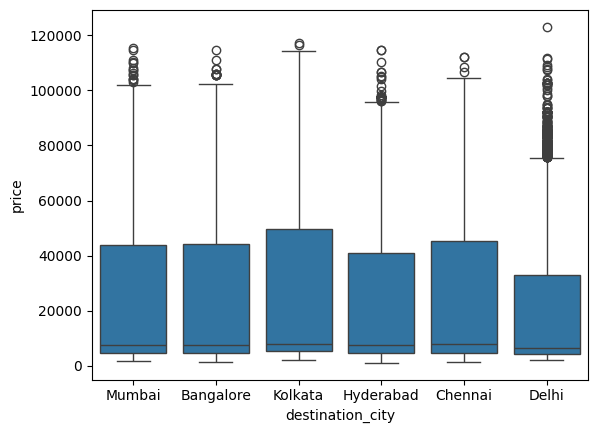

In [41]:
sns.boxplot(x = 'destination_city', y = 'price', data = df)

- The price is more for Kolkata destination.

In [42]:
df["class"].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

<Axes: xlabel='class'>

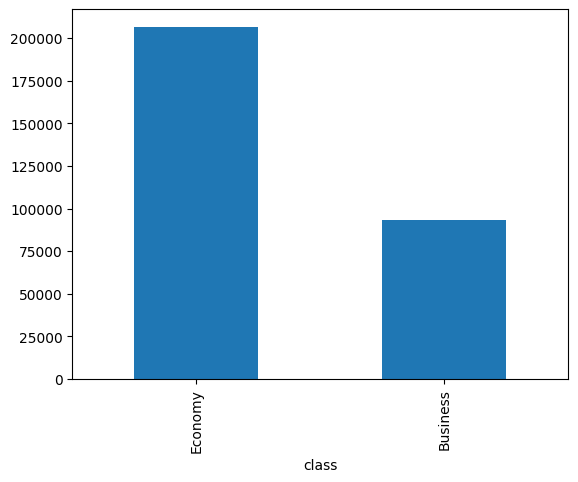

In [43]:
df['class'].value_counts().plot(kind='bar')

- More Number of ticket are for Economy class.

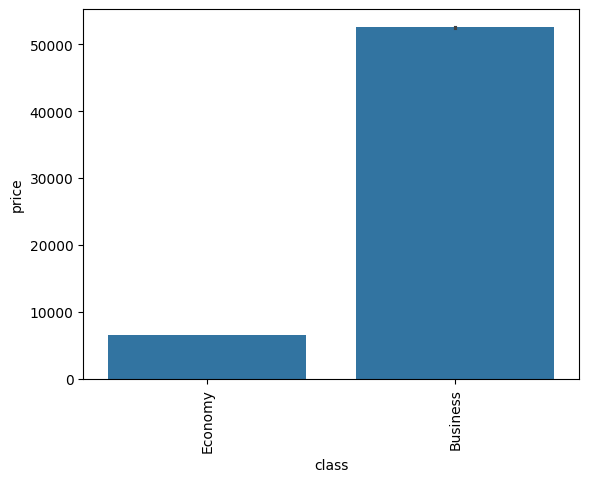

In [44]:
sns.barplot(x=df['class'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

- Business class ticket are costly as compared to Economy class.

<Axes: xlabel='class', ylabel='price'>

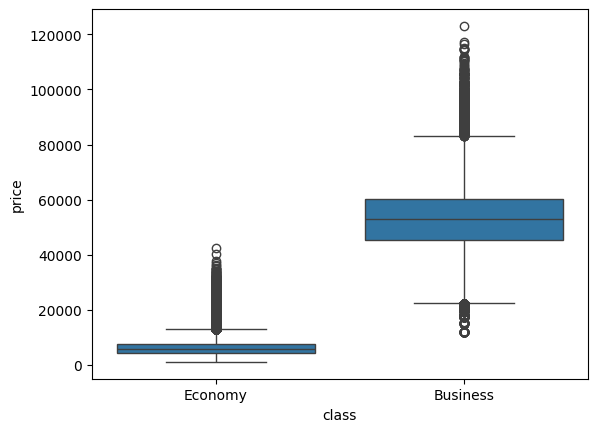

In [45]:
sns.boxplot(x = 'class', y = 'price', data = df)

- Huge difference between fare of both the classes.

C:\Users\fd01127\AppData\Local\Temp\ipykernel_14544\2111361885.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['duration'])


<Axes: xlabel='duration', ylabel='Density'>

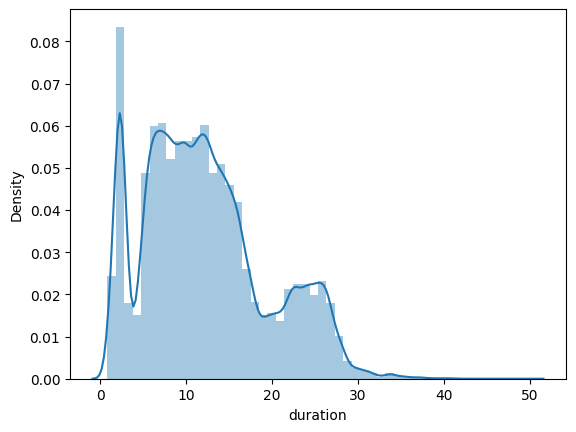

In [46]:
sns.distplot(df['duration'])

<Axes: xlabel='duration', ylabel='price'>

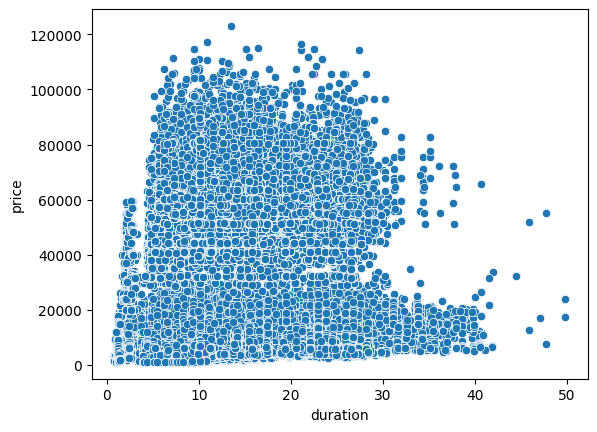

In [47]:
sns.scatterplot(x=df['duration'],y=df['price'])

- Their is slighty linear relationship.

<Axes: xlabel='duration', ylabel='price'>

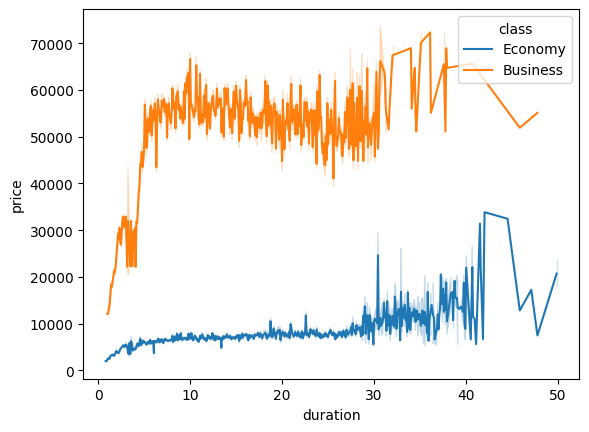

In [48]:
sns.lineplot(x='duration', y='price', data=df, hue='class')

- In Business class, from 1 to 7 hours, price growth sharply.
- In Economy class growth of price have a linear growth and for duration greater than 40 have a sharp rise in price.

C:\Users\fd01127\AppData\Local\Temp\ipykernel_14544\1998235800.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['days_left'])


<Axes: xlabel='days_left', ylabel='Density'>

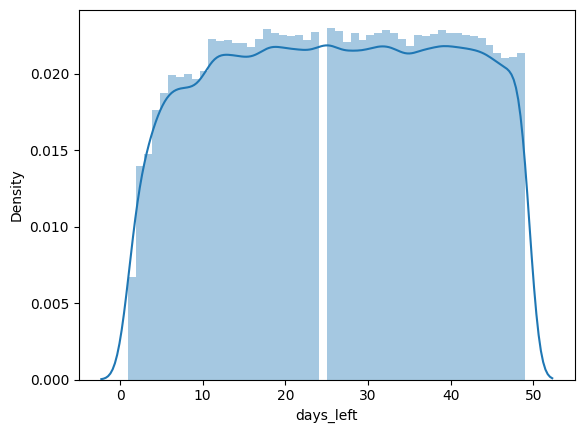

In [49]:
sns.distplot(df['days_left'])

<Axes: xlabel='days_left', ylabel='price'>

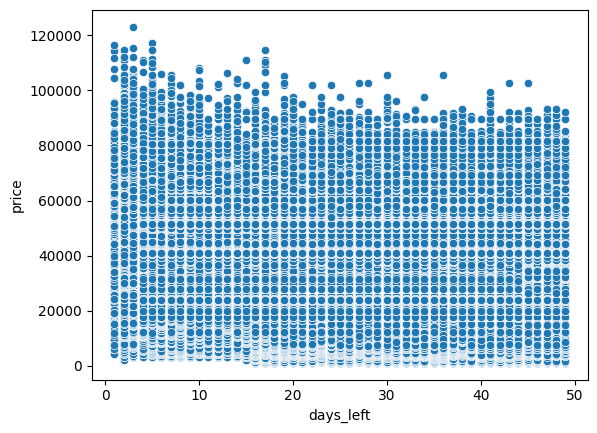

In [50]:
sns.scatterplot(x=df['days_left'],y=df['price'])

<Axes: xlabel='days_left', ylabel='price'>

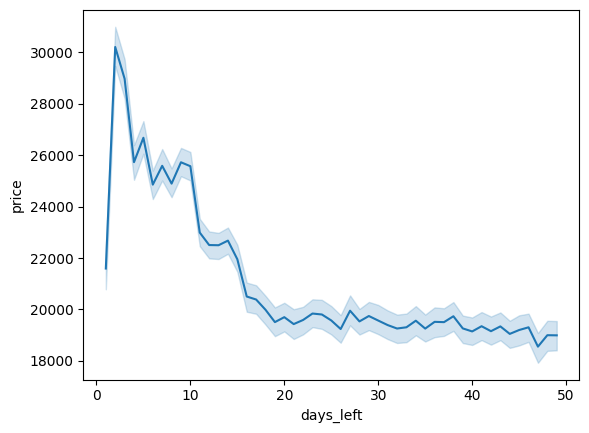

In [51]:
sns.lineplot(x='days_left', y='price', data=df)

- Price are more when the days are less to buy ticket.

In [52]:
df.drop('flight', axis=1, inplace=True)

In [53]:
df.sample()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
26549,Vistara,Delhi,Early_Morning,one,Evening,Kolkata,Economy,12.42,37,7221


In [54]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\fd01127\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [55]:
df.rename(columns={'class': 'travel_class'}, inplace=True)

In [56]:
df.sample()

,airline,source_city,departure_time,stops,arrival_time,destination_city,travel_class,duration,days_left,price
151191,Indigo,Kolkata,Evening,zero,Night,Chennai,Economy,2.42,35,2966


In [57]:
# from sklearn.preprocessing import OneHotEncoder

# categorical_columns = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'travel_class']

# encoder = OneHotEncoder(sparse=False, drop='first')

# encoded_columns = encoder.fit_transform(df[categorical_columns])

# encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_columns))

# df.drop(categorical_columns, axis=1, inplace=True)

# df = pd.concat([df, encoded_df], axis=1)

In [58]:
# import pickle
# pickle.dump(encoder,open('processed_data.pkl','wb'))

In [59]:
df.sample()

,airline,source_city,departure_time,stops,arrival_time,destination_city,travel_class,duration,days_left,price
267407,Vistara,Kolkata,Early_Morning,one,Night,Bangalore,Business,13.25,3,88950


In [60]:
df = df[['airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time', 'stops', 'travel_class', 'duration', 'days_left','price']]

In [61]:
df.sample()

,airline,source_city,destination_city,departure_time,arrival_time,stops,travel_class,duration,days_left,price
77881,Air_India,Mumbai,Chennai,Morning,Evening,one,Economy,9.0,6,9201


In [62]:
X = df.drop('price', axis=1)
y = df['price']

In [63]:
X

,airline,source_city,destination_city,departure_time,arrival_time,stops,travel_class,duration,days_left
0,SpiceJet,Delhi,Mumbai,Evening,Night,zero,Economy,2.17,1
1,SpiceJet,Delhi,Mumbai,Early_Morning,Morning,zero,Economy,2.33,1
2,AirAsia,Delhi,Mumbai,Early_Morning,Early_Morning,zero,Economy,2.17,1
3,Vistara,Delhi,Mumbai,Morning,Afternoon,zero,Economy,2.25,1
4,Vistara,Delhi,Mumbai,Morning,Morning,zero,Economy,2.33,1
...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Hyderabad,Morning,Evening,one,Business,10.08,49
300149,Vistara,Chennai,Hyderabad,Afternoon,Night,one,Business,10.42,49
300150,Vistara,Chennai,Hyderabad,Early_Morning,Night,one,Business,13.83,49
300151,Vistara,Chennai,Hyderabad,Early_Morning,Evening,one,Business,10.00,49


In [64]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(240122, 9)
(240122,)
(60031, 9)
(60031,)


In [67]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [68]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,3,4,5,6])
],remainder='passthrough')

step2 = RandomForestRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\fd01127\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.9848098787531225
MAE 1086.023067781051


In [69]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('model.pkl','wb'))

In [70]:
X_train.sample()

,airline,source_city,destination_city,departure_time,arrival_time,stops,travel_class,duration,days_left
29131,AirAsia,Delhi,Hyderabad,Night,Morning,one,Economy,12.0,5


In [71]:
5+5+ffj

NameError: name 'ffj' is not defined

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()

from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor()

from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor()

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

from sklearn.linear_model import Ridge
ridge = Ridge()

from sklearn.svm import SVR
svr = SVR(kernel='linear', C=1.0)

from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor

all_models_regression = {
    'XGBRegressor': xgb,
    'GradientBoostingRegressor': gbr,
    # 'ExtraTreesRegressor': etr,
    # 'BaggingRegressor': br,
    'AdaBoostRegressor': abr,
    'RandomForestRegressor': rfr,
    'KNeighborsRegressor': knr,
    'DecisionTreeRegressor': dtr,
    'LinearRegression': lr,
    'Ridge': ridge,
    # 'SVR': svr
}

In [ ]:
mse_scores = []
r2_scores = []

In [ ]:
def model_training_regression(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_scores.append(mse)
    r2_scores.append(r2)
    return mse, r2

In [ ]:
# mse_scores = []
# r2_scores = []

# for model_name, model_object in all_models_regression.items():
#     mse, r2 = model_training_regression(model_object, X_train, X_test, y_train, y_test) 
#     mse_scores.append(mse)
#     r2_scores.append(r2)

In [ ]:
# model_training_regression(xgb, X_train, X_test, y_train, y_test)

In [ ]:
mse_scores

In [ ]:
r2_scores

In [ ]:
# model_training_regression(gbr, X_train, X_test, y_train, y_test)

In [ ]:
mse_scores

In [ ]:
r2_scores

In [ ]:
# model_training_regression(etr, X_train, X_test, y_train, y_test)   Kernel Failed

In [ ]:
# model_training_regression(br, X_train, X_test, y_train, y_test)   Kernel Failed

In [ ]:
# model_training_regression(abr, X_train, X_test, y_train, y_test)

In [ ]:
mse_scores

In [ ]:
r2_scores

In [ ]:
model_training_regression(rfr, X_train, X_test, y_train, y_test)

In [ ]:
# model_training_regression(knr, X_train, X_test, y_train, y_test)

In [ ]:
# model_training_regression(dtr, X_train, X_test, y_train, y_test)

In [ ]:
# model_training_regression(lr, X_train, X_test, y_train, y_test)

In [ ]:
# model_training_regression(ridge, X_train, X_test, y_train, y_test)

In [ ]:
# model_training_regression(svr, X_train, X_test, y_train, y_test)

In [ ]:
# pd.DataFrame({'Algorithm':all_models_regression.keys(),'MSE':mse_scores,'R2_Score':r2_scores}).sort_values('R2_Score',ascending=False)

In [ ]:
# performance = pd.DataFrame({'Algorithm':all_models_regression.keys(),'MSE':mse_scores,'R2_Score':r2_scores}).sort_values('R2_Score',ascending=False)

In [ ]:
# performance.to_csv("performance.csv")

In [ ]:
# pd.read_csv("performance.csv")

Based on the metrics:

RandomForestRegressor: It has the lowest MSE and the highest R2 score, making it a strong candidate.

XGBRegressor: It has a relatively high R2 score, but its MSE is higher than that of the RandomForestRegressor.

DecisionTreeRegressor: Similar to XGBRegressor, it has a high R2 score but a higher MSE compared to RandomForestRegressor.

So we are going with RandomForestRegressor

In [ ]:
import pickle
pickle.dump(rfr,open('model.pkl','wb'))